       point_d  Year  day_number  hour  minute  second  100th_of_a_second  \
28         101    17          32     0       3      39                 84   
79         101    17          32     0      10      47                 86   
97         101    17          32     0      13      52                 99   
124        101    17          32     0      18      53                 89   
140        101    17          32     0      23      44                 99   
...        ...   ...         ...   ...     ...     ...                ...   
71536      101    17          32    23      24      41                 99   
71554      101    17          32    23      27      38                 13   
71621      101    17          32    23      37      30                 71   
71729      101    17          32    23      51      39                 99   
71745      101    17          32    23      53      43                 99   

       length_m  lane  direction  vehicle_class  speed_km/h  \
28         1

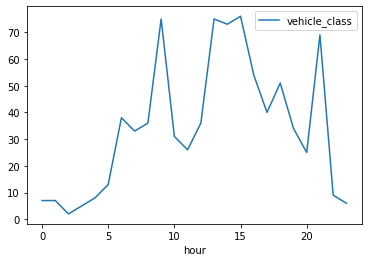

In [5]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

year = 2020
areaID = "01"
lamID = 101



#print("\n-----------------------------------------\n")

names = ["point_d", "Year", "day_number", "hour", "minute", "second", "100th_of_a_second", "length_m","lane", "direction", "vehicle_class", "speed_km/h", "faulty_0=valid_1=incorrect", "total_time", "interval","jonoalku"]


df = pd.read_csv("https://aineistot.vayla.fi/lam/rawdata/2017/01/lamraw_101_17_32.csv", names=names, sep = ";")

#print(df.head())

#print("\n-----------------------------------------\n")


df1 = df[df["vehicle_class"]==4]
print(df1)

df2 = df1.groupby("hour")["vehicle_class"].count()

df3= pd.DataFrame(df2)
print(df3)
#print("\n-----------------------------------------\n")


df3.plot()
plt.show()

In [11]:
#%%time

import datetime

year = "2020"
areaID = "01"
lamID = "101"
shortYear = year[-2:]
startDayNumber = "101"
endDayNumber = ""
vehicle_class =[4]

output = pd.DataFrame()





if(len(endDayNumber)!=0):
    start = int(startDayNumber)
    end = int(endDayNumber)
    duration = end - start
    print(duration)
    
    
    
    vehicleTotalNumberInOneDay = []
    date = []
    
    for x in range(duration):
        url = "https://aineistot.vayla.fi/lam/rawdata/{year}/{areaID}/lamraw_{lamID}_{shortYear}_{start}.csv".format(year=year,areaID=areaID,lamID=lamID,shortYear = shortYear, start=start)
        print(url)
        
        csv = pd.read_csv(url, names=names, sep = ";")
        df = csv[["vehicle_class"]==vehicle_class[0]]
        vehicleTotalNumberInOneDay.append(df["vehicle_class"].count())
        
        print(vehicleTotalNumberInOneDay)
        
        dt = datetime.datetime(int(year),1,1)
        dtdelta = datetime.timedelta(days=start)
        dt = dt + dtdelta
        dt=dt.strftime('%d.%m.%Y')
        date.append(dt)
        print(date)
        
        start +=1


    output["vehicle_number"] = vehicleTotalNumberInOneDay
    output["time"] = date
    output.set_index("time")

else:
    url = "https://aineistot.vayla.fi/lam/rawdata/{year}/{areaID}/lamraw_{lamID}_{shortYear}_{startDayNumber}.csv".format(year=year,areaID=areaID,lamID=lamID,shortYear = shortYear, startDayNumber=startDayNumber)
    
    allData = pd.read_csv(url, names=names, sep = ";")
    #df = allData[allData["vehicle_class"]==vehicle_class[0]]
    
    df = allData.groupby(["hour","vehicle_class"])["vehicle_class"].count().unstack(fill_value=0).stack()
    print(df.head(25))
    
    outjson = df.to_json()
    print(outjson)

    #df1 = df.groupby(df["hour"])["vehicle_class"].count()

    #output["vehicle_number"]= df1["vehicle_class"]
    #output["time"] = df2.index.values
   
    #print(output)
    # getting date from day number
    dt = datetime.datetime(int(year),1,1)
    dtdelta = datetime.timedelta(days=int(startDayNumber))
    dt = dt + dtdelta
    dt=dt.strftime('%d.%m.%Y')
    print(dt)
    
    



#print("\n-----------------------------------------\n")


#print("\n-----------------------------------------\n")


#output.plot()
#plt.show()

hour  vehicle_class
0     1                178
      2                  4
      3                 26
      4                  3
      5                  0
      6                  0
      7                  0
1     1                130
      2                  9
      3                 17
      4                  7
      5                  0
      6                  0
      7                  0
2     1                 73
      2                  8
      3                  2
      4                  0
      5                  0
      6                  0
      7                  0
3     1                 53
      2                  3
      3                  0
      4                  4
dtype: int64
{"(0, 1)":178,"(0, 2)":4,"(0, 3)":26,"(0, 4)":3,"(0, 5)":0,"(0, 6)":0,"(0, 7)":0,"(1, 1)":130,"(1, 2)":9,"(1, 3)":17,"(1, 4)":7,"(1, 5)":0,"(1, 6)":0,"(1, 7)":0,"(2, 1)":73,"(2, 2)":8,"(2, 3)":2,"(2, 4)":0,"(2, 5)":0,"(2, 6)":0,"(2, 7)":0,"(3, 1)":53,"(3, 2)":3,"(3, 3)":0,"(3, 4)":4,"(3, 5)"

In [3]:

# getting count number for each vehicle class, avarage speed for each class and direction

import datetime


year = "2020"
areaID = "01"
lamID = "101"
shortYear = year[-2:]
startDayNumber = "101"
endDayNumber = ""
vehicle_class =[4]

output = pd.DataFrame()



if(len(endDayNumber)!=0):
    start = int(startDayNumber)
    end = int(endDayNumber)
    duration = (end+1) - start
    print(duration)
    
    
    
    vehicleTotalNumberInOneDay = pd.DataFrame()
    date = []
    
    for x in range(duration):
        url = "https://aineistot.vayla.fi/lam/rawdata/{year}/{areaID}/lamraw_{lamID}_{shortYear}_{start}.csv".format(year=year,areaID=areaID,lamID=lamID,shortYear = shortYear, start=start)
        csv = pd.read_csv(url, names=names, sep = ";")
        
        #getting the day from sequectial day number
        dt = datetime.datetime(int(year),1,1)
        dtdelta = datetime.timedelta(days=start)
        dt = dt + dtdelta
        dt=dt.strftime('%d.%m.%Y')
        date.append(dt)
        print(date)
        
        
        #temp = csv.groupby(["vehicle_class"])["vehicle_class"].count()
        temp = csv.groupby(["vehicle_class","direction"]).agg({"vehicle_class":"count", "speed_km/h":"mean"})\
        .rename(columns={'vehicle_class':'vehicle_number','speed_km/h':'avg_speed_km_h'})
        
        #changing indexes to create uniqe indexs containing date and vehicle class
        indexv = temp.index.values.tolist() 
        newindex = []
        for i in range(len(indexv)):
            a= list(indexv[i])
            a[0] = dt+"_"+str(a[0])
            newindex.append(tuple(a))
              
        #print(newindex)
        
        
        #setting the new index to dataframe
        temp["date_vehicleclass_direction"]= newindex
        temp.set_index("date_vehicleclass_direction", inplace= True)
        
        vehicleTotalNumberInOneDay= vehicleTotalNumberInOneDay.append(temp)
        
        #print(vehicleTotalNumberInOneDay)
        

        
        start +=1
        
    
    output= vehicleTotalNumberInOneDay
    #output["date"] = date
    #output.set_index("date", inplace = True)
    print(output)
    outputJson = output.to_json()
    print(outputJson)

else:
    print("in else!")
    url = "https://aineistot.vayla.fi/lam/rawdata/{year}/{areaID}/lamraw_{lamID}_{shortYear}_{startDayNumber}.csv".format(year=year,areaID=areaID,lamID=lamID,shortYear = shortYear, startDayNumber=startDayNumber)
    
    allData = pd.read_csv(url, names=names, sep = ";")
    #df = allData[allData["vehicle_class"]==vehicle_class[0]]
    
    # getting date from day number
    dt = datetime.datetime(int(year),1,1)
    dtdelta = datetime.timedelta(days=int(startDayNumber))
    dt = dt + dtdelta
    dt=dt.strftime('%d.%m.%Y')
    print(dt)
    
    df = allData.groupby(["hour","vehicle_class","direction"]).agg({"vehicle_class": "count", "speed_km/h":"mean"})\
         .rename(columns={'vehicle_class':'vehicle_number','speed_km/h':'avg_speed_km_h'})
        
    print(df.head(25))
    
    outjson = df.to_json()
    print(outjson)
    

#print("\n-----------------------------------------\n")

#output.plot()
#plt.show()

in else!
11.04.2020
                              vehicle_number  avg_speed_km_h
hour vehicle_class direction                                
0    1             1                     107       84.373832
                   2                      71       83.943662
     2             1                       2       85.000000
                   2                       2       81.500000
     3             1                      12       77.833333
                   2                      14       79.642857
     4             1                       3       82.000000
1    1             1                      76       88.026316
                   2                      54       85.000000
     2             1                       5       78.200000
                   2                       4       78.000000
     3             1                      11       78.000000
                   2                       6       78.000000
     4             1                       4       76.750000
    

In [7]:
# getting count number for each vehicle class, avarage speed for each class and direction

import datetime
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


year = "2020"
areaID = "08"
lamID = "705"
shortYear = year[-2:]
startDayNumber = "30"
endDayNumber = ""
vehicle_class =[4]

output = pd.DataFrame()

names = ["point_d", "Year", "day_number", "hour", "minute", "second", "100th_of_a_second", "length_m","lane", "direction", "vehicle_class", "speed_km/h", "faulty_0=valid_1=incorrect", "total_time", "interval","jonoalku"]

print(lamID)

if(len(endDayNumber)!=0):
    start = int(startDayNumber)
    end = int(endDayNumber)
    duration = (end+1) - start
    print(duration)
    
    
    
    vehicleTotalNumberInOneDay = pd.DataFrame()
    date = []
    
    for x in range(duration):
        print(start)
        url = "https://aineistot.vayla.fi/lam/rawdata/{year}/{areaID}/lamraw_{lamID}_{shortYear}_{start}.csv".format(year=year,areaID=areaID,lamID=lamID,shortYear = shortYear, start=start)
        csv = pd.read_csv(url, names=names, sep = ";")
        
        #getting the day from sequectial day number
        dt = datetime.datetime(int(year),1,1)
        dtdelta = datetime.timedelta(days=(start-1))
        dt = dt + dtdelta
        dt=dt.strftime('%d.%m.%Y')
        date.append(dt)
        print(date)
        
        
        #temp = csv.groupby(["vehicle_class"])["vehicle_class"].count()
        temp = csv.groupby(["vehicle_class","direction"]).agg({"vehicle_class":"count", "speed_km/h":"mean"})\
        .rename(columns={'vehicle_class':'vehicle_number','speed_km/h':'avg_speed_km_h'})
        
        #changing indexes to create uniqe indexs containing date and vehicle class
        indexv = temp.index.values.tolist() 
        newindex = []
        for i in range(len(indexv)):
            a= list(indexv[i])
            a[0] = dt+"_"+str(a[0])
            newindex.append(tuple(a))
              
        #print(newindex)
        
        
        #setting the new index to dataframe
        temp["date_vehicleclass_direction"]= newindex
        temp.set_index("date_vehicleclass_direction", inplace= True)
        
        vehicleTotalNumberInOneDay= vehicleTotalNumberInOneDay.append(temp)
        
        #print(vehicleTotalNumberInOneDay)
        

        
        start +=1
        
    
    output= vehicleTotalNumberInOneDay
    #output["date"] = date
    #output.set_index("date", inplace = True)
    print(output)
    outputJson = output.to_json()
    print(outputJson)

else:
    print("in else!")
    url = "https://aineistot.vayla.fi/lam/rawdata/{year}/{areaID}/lamraw_{lamID}_{shortYear}_{startDayNumber}.csv".format(year=year,areaID=areaID,lamID=lamID,shortYear = shortYear, startDayNumber=startDayNumber)
    
    allData = pd.read_csv(url, names=names, sep = ";")
    #df = allData[allData["vehicle_class"]==vehicle_class[0]]
    
    # getting date from day number
    dt = datetime.datetime(int(year),1,1)
    dtdelta = datetime.timedelta(days=int(startDayNumber))
    dt = dt + dtdelta
    dt=dt.strftime('%d.%m.%Y')
    print(dt)
    
    df = allData.groupby(["hour","vehicle_class","direction"]).agg({"vehicle_class": "count", "speed_km/h":"mean"})\
         .rename(columns={'vehicle_class':'vehicle_number','speed_km/h':'avg_speed_km_h'})
    df['avg_speed_km_h'] = df['avg_speed_km_h'].astype(float).round(1)
    print(df.head(25))
    
    outjson = df.to_json()
    print(outjson)
    

#print("\n-----------------------------------------\n")

#output.plot()
#plt.show()

705
in else!
31.01.2020
                              vehicle_number  avg_speed_km_h
hour vehicle_class direction                                
0    1             1                       3            69.7
                   2                       4            70.2
     2             1                       1            58.0
     5             1                       3            70.3
                   2                       1            68.0
1    1             1                       4            73.0
                   2                       4            64.5
     5             1                       3            65.3
                   2                       1            69.0
2    1             1                       6            70.3
                   2                       7            74.7
     5             1                       1            83.0
3    1             1                       5            70.4
                   2                       4            65.0
